🧹 Remove null rows/missing values
✅ No null or missing values
Shape after removing missing values: (200, 4)
Shape after removing duplicates: (200, 4)

🔢 Convert meaningful object columns to numeric
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB

📊 Check for Outliers
Number of outlier rows: 2
    Genre  Age  Annual Income (k$)  Spending Score (1-100)
198  Male   32                 137                      18
199  Male   30                 137                      83


C:\Users\KIIT0001\datareveal\model\preprocess.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


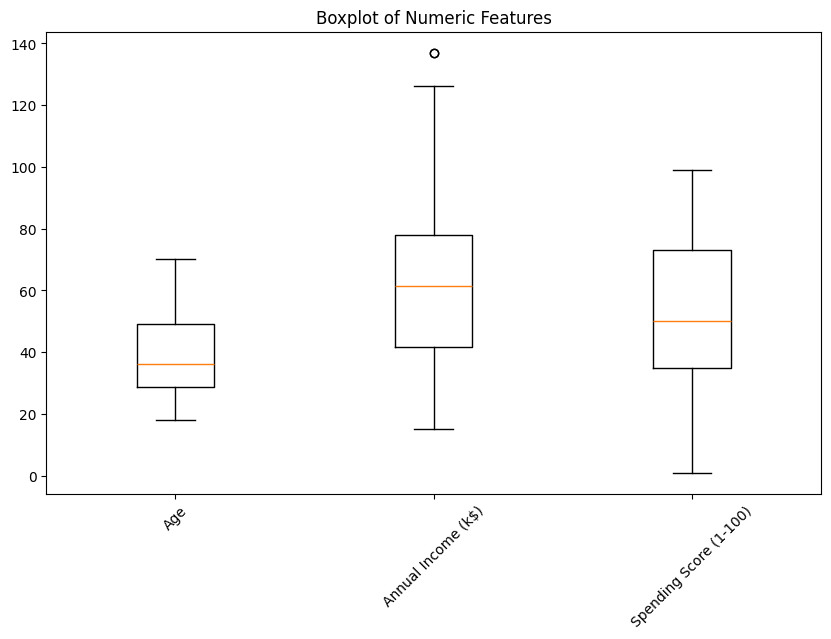

Removed rows: 2
Remaining rows: 198
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [2]:
from preprocess import df_clean

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df_clean.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,-1.645200,-1.847091,-0.445324
1,Male,-1.440717,-1.847091,1.205757
2,Female,-1.542352,-1.803615,-1.700072
3,Female,-1.241187,-1.803615,1.045985
4,Female,-0.496946,-1.760194,-0.406830


In [23]:
df = df_clean

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   198 non-null    object 
 1   Age                     198 non-null    float64
 2   Annual Income (k$)      198 non-null    float64
 3   Spending Score (1-100)  198 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.3+ KB


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [78]:
def scale(df_clean):
    numeric_col = df_clean.select_dtypes(include=['number']).columns
    X = df_clean[numeric_col].values

    # 1️⃣ Power transform then scale
    pt = PowerTransformer(method='yeo-johnson')
    X_pt = pt.fit_transform(X)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_pt)

    # 2️⃣ PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Total variance explained by 2 components:", sum(pca.explained_variance_ratio_))

    # 3️⃣ Plot histograms after transformation
    for i, col in enumerate(numeric_col):
        plt.figure(figsize=(10,5))
        sns.histplot(X_scaled[:, i], kde=True)
        plt.title(f'Distribution of {col} after Transformation')
        plt.show()

    # 4️⃣ Elbow method to choose K
    inertia = []
    K = range(1,10)
    for k in K:
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(X_scaled)
        inertia.append(km.inertia_)

    distances = [abs(K[i+1]-K[i]) + abs(inertia[i+1]-inertia[i]) for i in range(len(K)-1)]
    elbow_index = np.argmin(distances) + 1 


    plt.figure(figsize=(8,5))
    plt.plot(K, inertia, 'o-', color='blue')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # 5️⃣ Fit KMeans with chosen k (e.g., k=3)
    optimal_k = 4
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df_clean['clusters'] = clusters
    df_pca['clusters'] = clusters

    print("Cluster centers (scaled space):\n", kmeans.cluster_centers_)

    # 6️⃣ Plot clusters on PCA
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='PC1', y='PC2', hue='clusters', data=df_pca, palette='Set2', s=100)
    plt.title('K-Means Clustering on PCA Components')
    plt.show()

    # 7️⃣ Pairplot (all numeric columns)
    df_plot = df_clean.copy()
    df_plot['clusters'] = df_plot['clusters'].astype(str)
    sns.pairplot(df_plot, vars=numeric_col, hue='clusters', palette='Set2', diag_kind='kde')
    plt.suptitle('Pairplot of Clusters', y=1.02)
    plt.show()

    return df_clean, df_pca


Explained variance ratio: [0.40869292 0.29414463]
Total variance explained by 2 components: 0.702837545959076


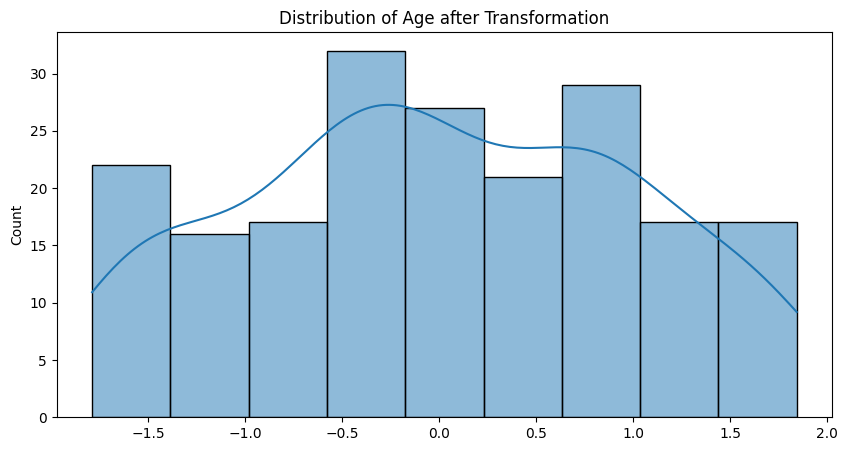

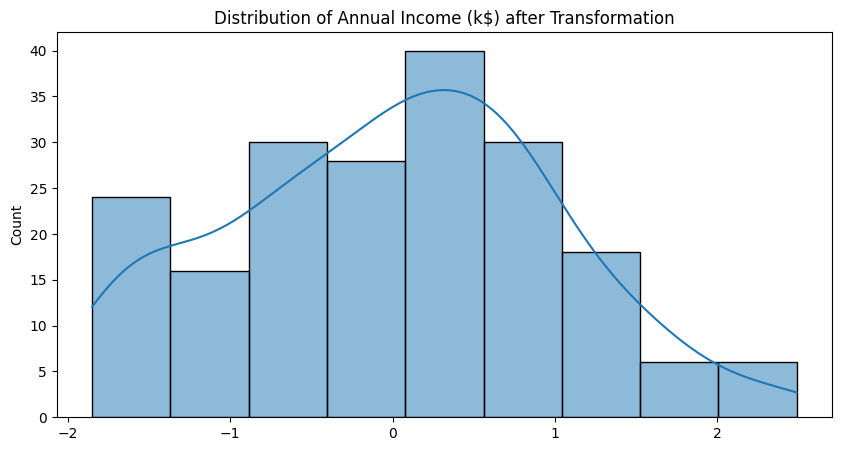

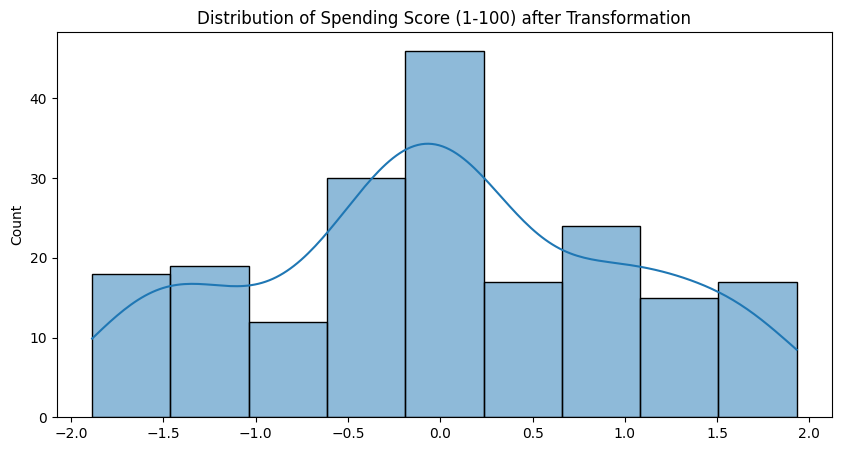

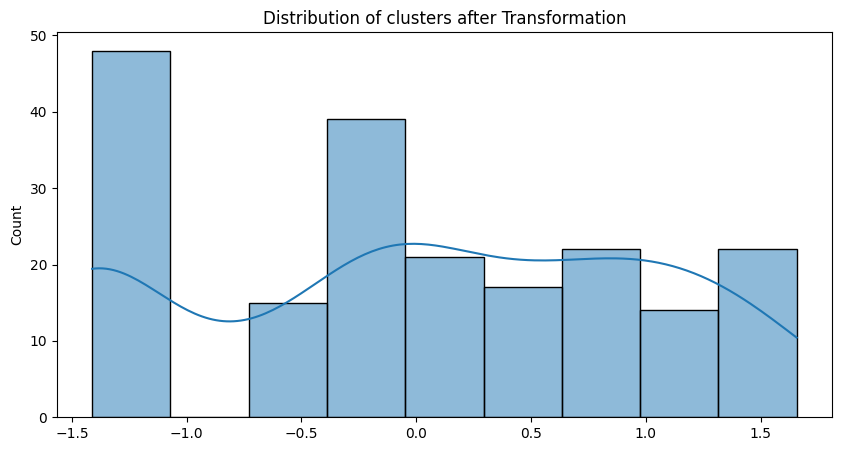

C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\sklearn\cluster\_kmea

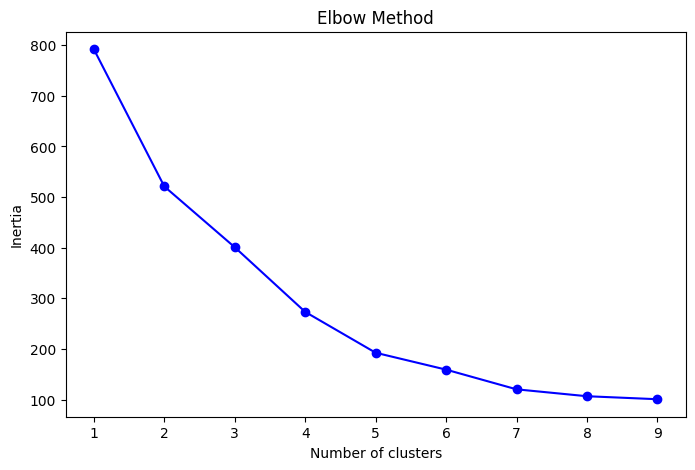

C:\Users\KIIT0001\Downloads\ANACON\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster centers (scaled space):
 [[ 1.01867115  0.06203569 -0.32647421 -1.23824949]
 [-0.32687432  0.9873616   1.2269581  -0.16744758]
 [-1.06674298 -0.81672774  0.40627482  0.71563385]
 [ 0.17665072  0.06108963 -1.2104538   1.10195883]]


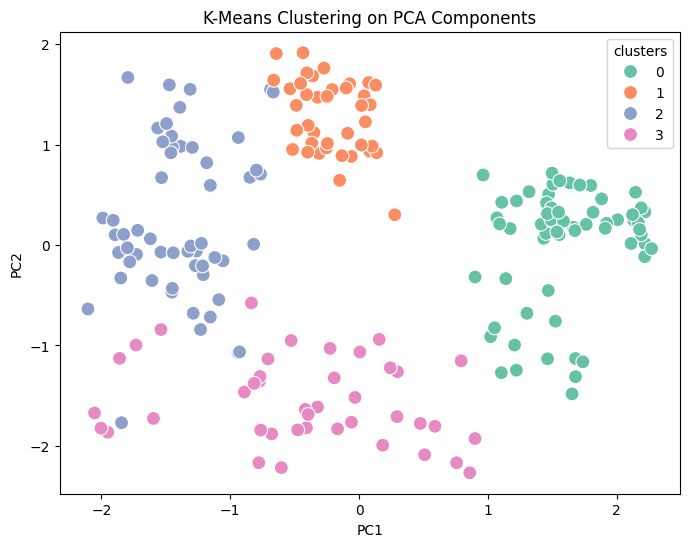

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

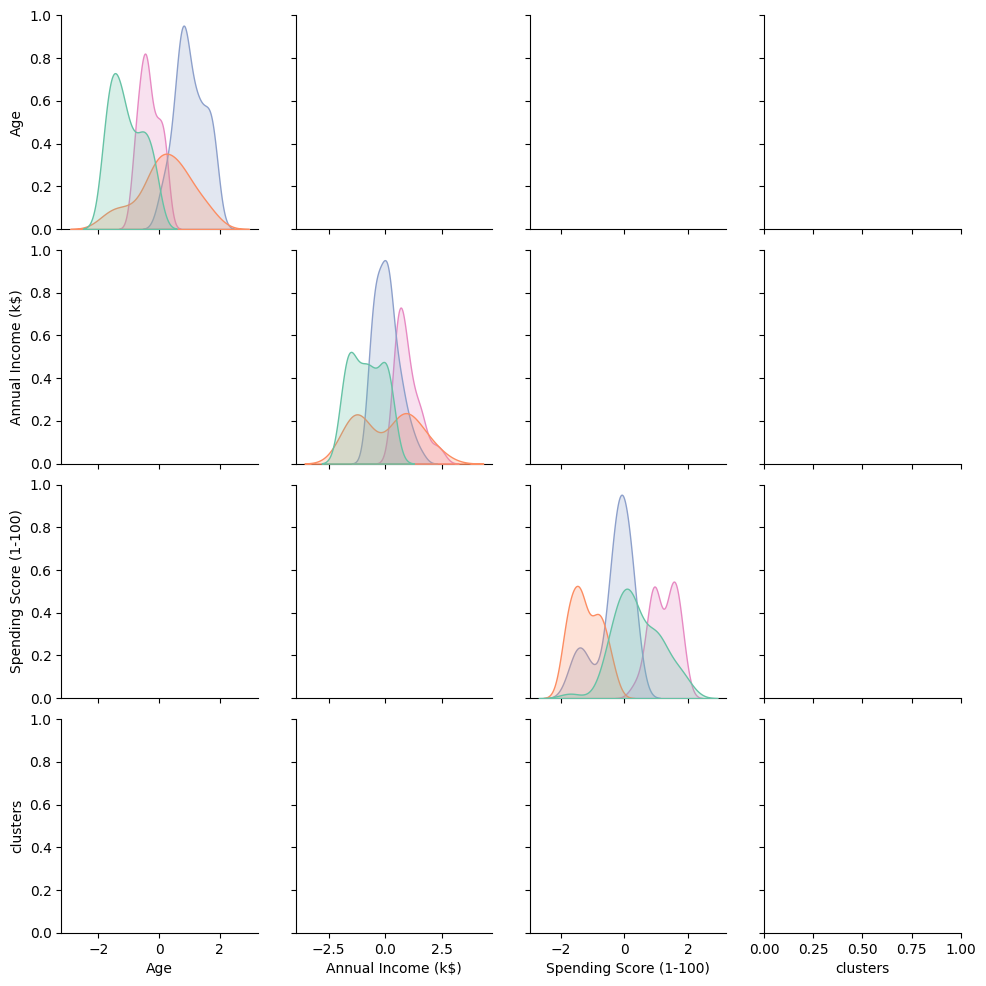

In [79]:
scale(df_clean)

In [83]:
df_clean.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,-1.679340,-1.850532,-0.445905,2
1,Male,-1.463495,-1.850532,1.206148,2
2,Female,-1.570651,-1.806857,-1.698745,2
3,Female,-1.253884,-1.806857,1.046118,2
4,Female,-0.482415,-1.763240,-0.407441,2


In [84]:
df_clean.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'clusters'],
      dtype='object')